<h1 style="font-familiy:raleway;font-size:30px;text-align:center">Felix Filipi</h1>

In [1]:
import tensorflow as tf
import os

<h1 style="font-familiy:raleway;font-size:20px">Dataset sudah berada dalam kondisi didownload dan sudah di extract</h1>

In [2]:
path='datasets/rockpaperscissors'

In [3]:
os.listdir(path)

['paper', 'README_rpc-cv-images.txt', 'rock', 'scissors']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(rescale=1./255,rotation_range=45,shear_range = 0.2,
                             brightness_range=[0.7,1.0],horizontal_flip=True,vertical_flip=True
                             ,fill_mode = 'nearest',validation_split=0.4)

In [5]:
train_gen = datagen.flow_from_directory(path,target_size=(150, 150),# resolution(60x60) px
                                        batch_size=4,class_mode='categorical',subset='training')
 
val_gen = datagen.flow_from_directory(path,target_size=(150, 150),
                                      batch_size=4,class_mode='categorical',subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
from keras.layers.normalization import BatchNormalization
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3))),
model.add(tf.keras.layers.MaxPooling2D(2, 2)),
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu')),
model.add(tf.keras.layers.MaxPooling2D(2,2)),
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu')),
model.add(tf.keras.layers.MaxPooling2D(2,2)),
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu')),
model.add(tf.keras.layers.MaxPooling2D(2,2)),
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(300))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Activation('softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(0.0001),
              metrics =['accuracy'])

In [8]:
history=model.fit(train_gen, steps_per_epoch=10, epochs=120, validation_data=val_gen, validation_steps=4,verbose=1)

Epoch 1/120
10/10 [==============================] - 5s 488ms/step - loss: 1.1046 - acc: 0.4250 - val_loss: 1.0837 - val_acc: 0.4375
Epoch 2/120
10/10 [==============================] - 1s 101ms/step - loss: 1.0109 - acc: 0.4750 - val_loss: 1.0965 - val_acc: 0.3125
Epoch 3/120
10/10 [==============================] - 1s 68ms/step - loss: 0.8969 - acc: 0.6250 - val_loss: 1.1027 - val_acc: 0.3750
Epoch 4/120
10/10 [==============================] - 1s 64ms/step - loss: 0.9343 - acc: 0.6250 - val_loss: 1.1325 - val_acc: 0.1875
Epoch 5/120
10/10 [==============================] - 1s 70ms/step - loss: 0.9742 - acc: 0.6000 - val_loss: 1.1124 - val_acc: 0.1875
Epoch 6/120
10/10 [==============================] - 1s 82ms/step - loss: 0.9275 - acc: 0.6000 - val_loss: 1.0853 - val_acc: 0.1875
Epoch 7/120
10/10 [==============================] - 1s 81ms/step - loss: 0.8741 - acc: 0.5750 - val_loss: 1.0865 - val_acc: 0.2500
Epoch 8/120
10/10 [==============================] - 1s 77ms/step - loss: 

10/10 [==============================] - 1s 76ms/step - loss: 0.3514 - acc: 0.8750 - val_loss: 0.7891 - val_acc: 0.5625
Epoch 38/120
10/10 [==============================] - 1s 85ms/step - loss: 0.1808 - acc: 0.9500 - val_loss: 1.0209 - val_acc: 0.4375
Epoch 39/120
10/10 [==============================] - 1s 74ms/step - loss: 0.4428 - acc: 0.8000 - val_loss: 0.8923 - val_acc: 0.4375
Epoch 40/120
10/10 [==============================] - 1s 73ms/step - loss: 0.3616 - acc: 0.8250 - val_loss: 1.0745 - val_acc: 0.3125
Epoch 41/120
10/10 [==============================] - 1s 79ms/step - loss: 0.5939 - acc: 0.7750 - val_loss: 0.6849 - val_acc: 0.8125
Epoch 42/120
10/10 [==============================] - 1s 74ms/step - loss: 0.3016 - acc: 0.9500 - val_loss: 0.7534 - val_acc: 0.6875
Epoch 43/120
10/10 [==============================] - 1s 71ms/step - loss: 0.4478 - acc: 0.8250 - val_loss: 0.7861 - val_acc: 0.5625
Epoch 44/120
10/10 [==============================] - 1s 68ms/step - loss: 0.5775 

10/10 [==============================] - 1s 72ms/step - loss: 0.2501 - acc: 0.9250 - val_loss: 0.9027 - val_acc: 0.6250
Epoch 75/120
10/10 [==============================] - 1s 67ms/step - loss: 0.3002 - acc: 0.9000 - val_loss: 0.1861 - val_acc: 0.9375
Epoch 76/120
10/10 [==============================] - 1s 71ms/step - loss: 0.4852 - acc: 0.8250 - val_loss: 0.7111 - val_acc: 0.6875
Epoch 77/120
10/10 [==============================] - 1s 68ms/step - loss: 0.4531 - acc: 0.7750 - val_loss: 0.1040 - val_acc: 1.0000
Epoch 78/120
10/10 [==============================] - 1s 67ms/step - loss: 0.3366 - acc: 0.8000 - val_loss: 0.0700 - val_acc: 1.0000
Epoch 79/120
10/10 [==============================] - 1s 69ms/step - loss: 0.2602 - acc: 0.9000 - val_loss: 0.1050 - val_acc: 0.9375
Epoch 80/120
10/10 [==============================] - 1s 68ms/step - loss: 0.4283 - acc: 0.8250 - val_loss: 1.2114 - val_acc: 0.6250
Epoch 81/120
10/10 [==============================] - 1s 69ms/step - loss: 0.3758 

Epoch 111/120
10/10 [==============================] - 1s 77ms/step - loss: 0.4380 - acc: 0.8500 - val_loss: 1.0951 - val_acc: 0.6250
Epoch 112/120
10/10 [==============================] - 1s 73ms/step - loss: 0.3789 - acc: 0.9000 - val_loss: 1.6244 - val_acc: 0.6250
Epoch 113/120
10/10 [==============================] - 1s 73ms/step - loss: 0.4670 - acc: 0.7500 - val_loss: 0.8744 - val_acc: 0.6875
Epoch 114/120
10/10 [==============================] - 1s 74ms/step - loss: 0.3288 - acc: 0.8750 - val_loss: 0.2824 - val_acc: 0.8750
Epoch 115/120
10/10 [==============================] - 1s 75ms/step - loss: 0.2458 - acc: 0.9500 - val_loss: 1.2874 - val_acc: 0.5625
Epoch 116/120
10/10 [==============================] - 1s 71ms/step - loss: 0.4021 - acc: 0.8000 - val_loss: 0.5125 - val_acc: 0.7500
Epoch 117/120
10/10 [==============================] - 1s 71ms/step - loss: 0.3711 - acc: 0.8750 - val_loss: 1.7845 - val_acc: 0.5000
Epoch 118/120
10/10 [==============================] - 1s 67ms

In [9]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


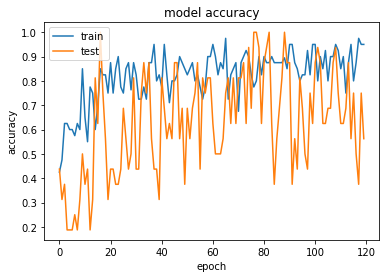

In [10]:
# plot accuracy vs valiadation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [11]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Scissor


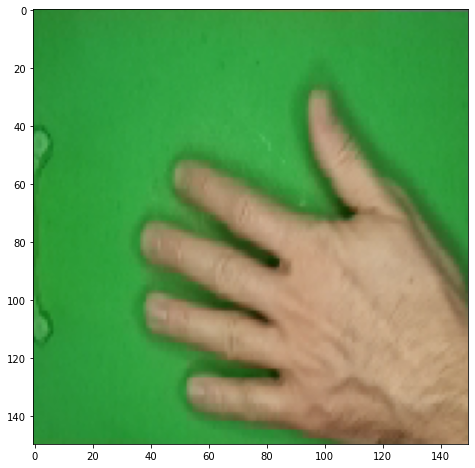

In [12]:
img_path='datasets/tes1.png'

img = image.load_img(img_path, target_size=(150,150))
plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)

if classes[0,0]==1:
    print('Paper')
elif classes[0,1]==1:
    print('Rock')
elif classes[0,2]==1:
    print('Scissor')

Rock


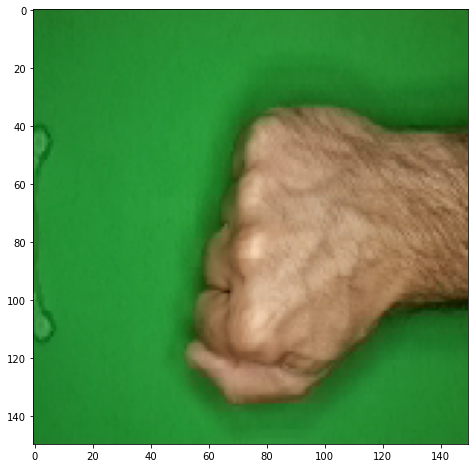

In [13]:
img_path='datasets/tes2.png'

img = image.load_img(img_path, target_size=(150,150))
plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)

if classes[0,0]==1:
    print('Paper')
elif classes[0,1]==1:
    print('Rock')
elif classes[0,2]==1:
    print('Scissor')

Paper


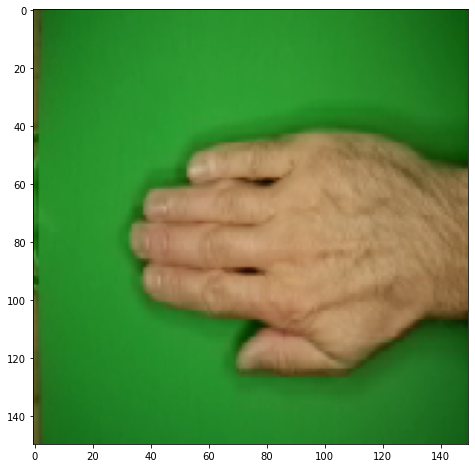

In [14]:
img_path='datasets/tes3.png'

img = image.load_img(img_path, target_size=(150,150))
plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)

if classes[0,0]==1:
    print('Paper')
elif classes[0,1]==1:
    print('Rock')
elif classes[0,2]==1:
    print('Scissor')